# Kuramoto Networks with Infinitely Many Stable Equilibria

In this notebook we construct finite graphs supporting 2-dimensional manifolds of stable equilibria.

In [7]:
# libraries
import numpy as np
np.set_printoptions(precision=2, suppress=True)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
import networkx as nx

# numerical integration
def simulation(graph, initial_condition, step_size, steps, noise=0, reverse=False, coupling_function=np.sin):
    """ Returns the evolution of theta """
    G = graph
    theta = initial_condition
    f = coupling_function
    N = len(theta)
    if noise != None:
        theta = np.mod(theta + np.random.random(N)*noise, 2*np.pi)
    data = []
    if reverse == False:
        for _ in range(steps):
            data.append(theta)
            theta = np.mod(theta + step_size*np.array([sum([f(theta[j]-theta[k]) for j in G.neighbors(k)]) for k in G.nodes()]), 2*np.pi)
    if reverse == True:
        for _ in range(steps):
            data.append(theta)
            theta = np.mod(theta - step_size*np.array([sum([f(theta[j]-theta[k]) for j in G.neighbors(k)]) for k in G.nodes()]), 2*np.pi)
    return data

# animated graph plot
def kamada_kawai_plot(G, data, speed, k = None, layout = None):
    """ Color representation on graph. """
    fig, ax = plt.subplots(figsize=(8,7))
    ax.set_xlim(-1.15,1.15)
    ax.set_ylim(-1.15,1.15)
    ax.set_aspect(1)
    ax.axis('off')
    data = np.array([data[k] for k in range(int(len(data))) if k%speed==0])
    pos = nx.drawing.layout.kamada_kawai_layout(G)
    if k!=None:
        pos = nx.drawing.layout.spring_layout(G, k)
    if layout!=None:
        pos = layout
    N = len(G.nodes())
    for edge in np.array(G.edges()):
        first_node, second_node = edge[0], edge[1]
        [first_node_x, first_node_y] = pos[first_node]
        [second_node_x, second_node_y] = pos[second_node]
        plt.plot([first_node_x, second_node_x], [first_node_y, second_node_y], color='gray', linewidth=1, zorder=-1)
    balls = [0 for _ in range(N)]
    for node in np.array(G.nodes()):
        balls[node] = plt.scatter(
            [pos[node][0]],
            [pos[node][1]],
            s = [750 / (1+np.sqrt(N))],
            c = [np.array([data[0][node]])],
            norm = plt.Normalize(vmin=0, vmax=2*np.pi),
            cmap = plt.get_cmap('hsv'),)
    text = ax.text(-1.15, -1.15, 0)
    def animate(frame):
        text.set_text("step: {}".format(frame*speed)) 
        for node in np.array(G.nodes()):
            balls[node].set_array(np.array([data[frame][node]]))
    anim = animation.FuncAnimation(fig, animate, interval=1)
    return anim

# splay state
def splay(N):
    return np.array([k*2*np.pi/N for k in range(N)])

# Eye Graph

<IPython.core.display.Javascript object>


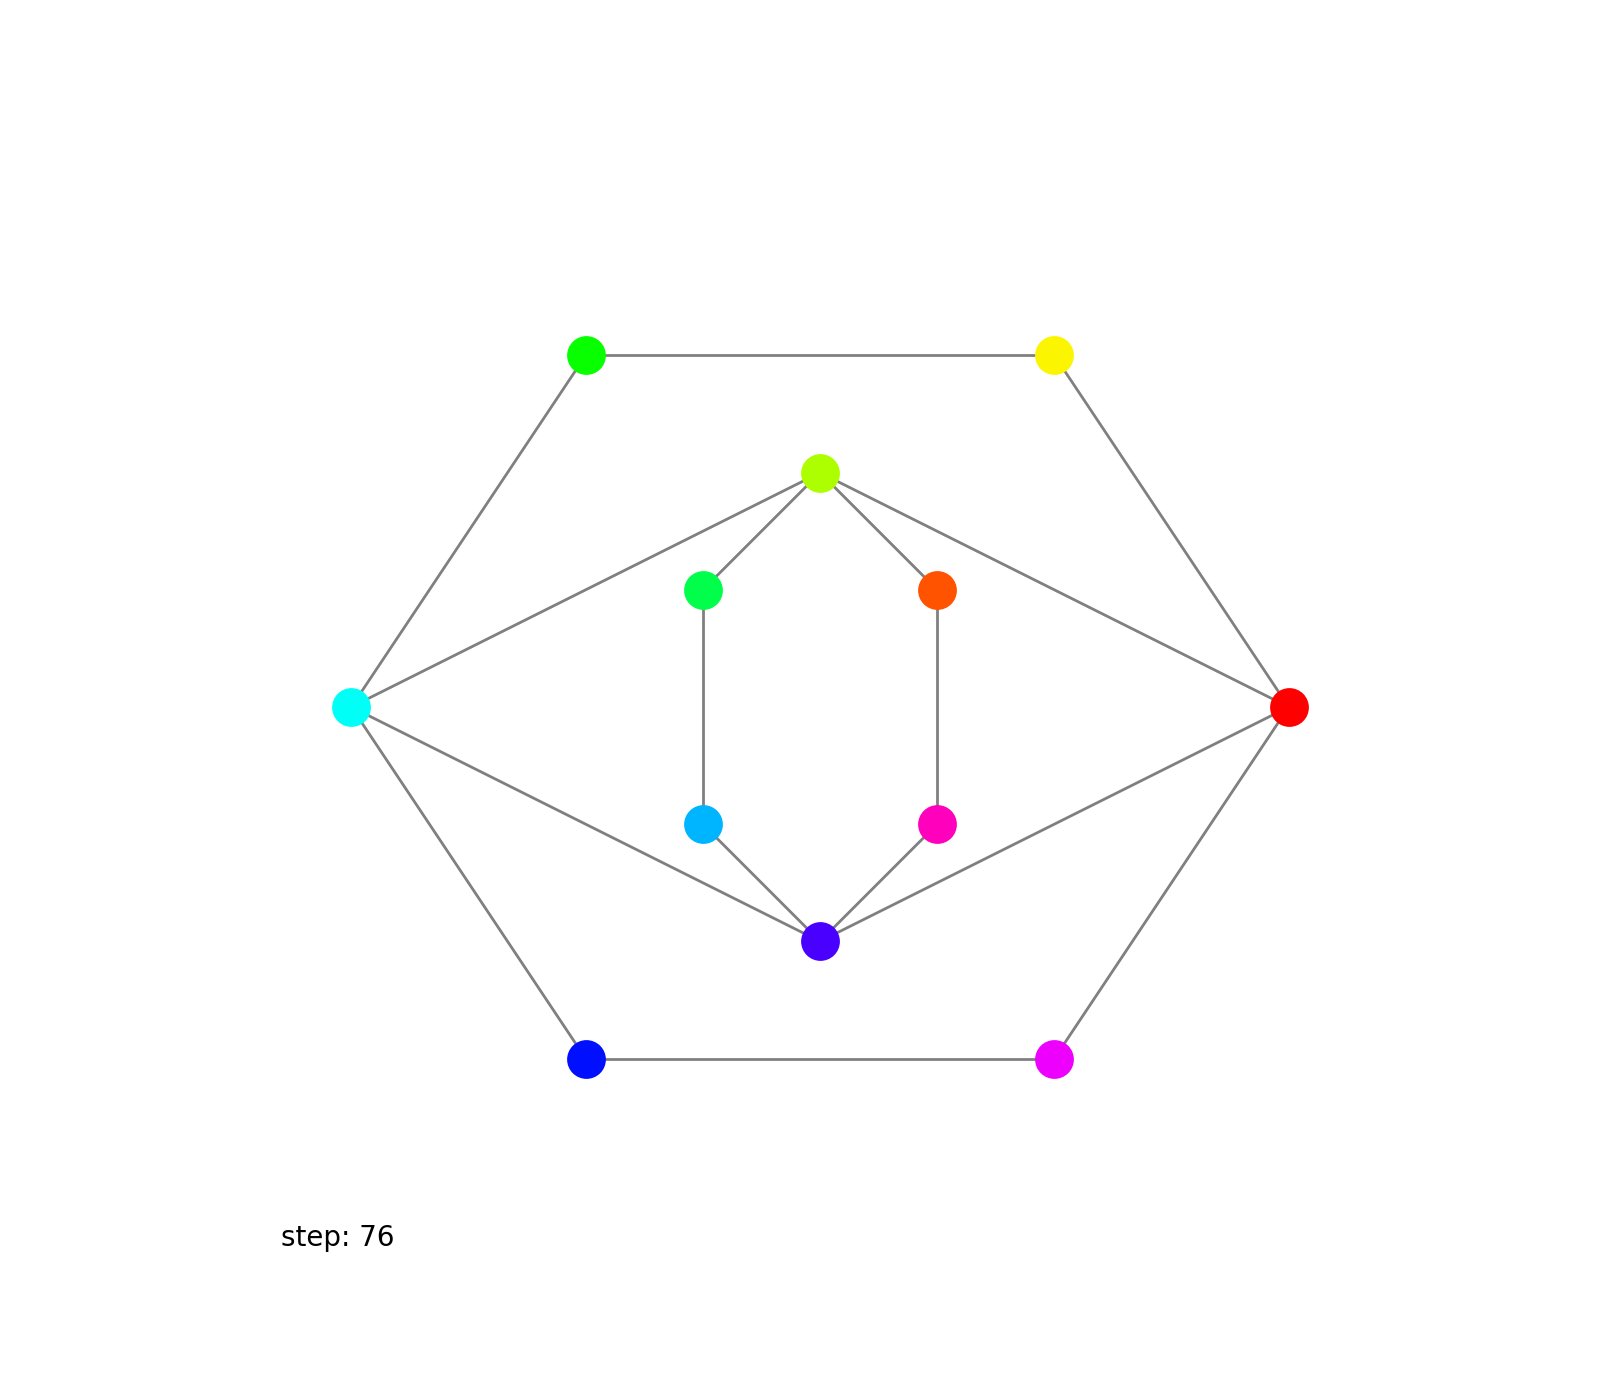

In [20]:
# graph construction
G1 = nx.cycle_graph(6)
G2 = nx.cycle_graph(6)
G2 = nx.relabel_nodes(G2, {k:k+6 for k in range(6)})
G = nx.union(G1, G2)
G.add_edge(0,6)
G.add_edge(0,9)
G.add_edge(3,6)
G.add_edge(3,9)

# for every alpha, beta the following state is an equilibrium
alpha = 0.0
beta = 1.4
state = np.concatenate((splay(6)+alpha, splay(6)+beta))

# computing trajectory
# change noise=0 to analyze stability
data = simulation(
            graph=G,
            initial_condition = state,
            step_size = 0.01,
            steps = 2000,
            noise = 0.0,
            )

# plot
pos = {0:[4,0], 1:[2,3], 2:[-2,3], 3:[-4,0], 4:[-2,-3], 5:[2,-3], 6:[0,2], 7:[-1,1], 8:[-1,-1],
    9:[0,-2], 10:[1,-1], 11:[1,1]}

for key, value in pos.items():
    pos[key] = np.array(value)/4
    
kamada_kawai_plot(G, data, speed=1, layout = pos)

<IPython.core.display.Javascript object>


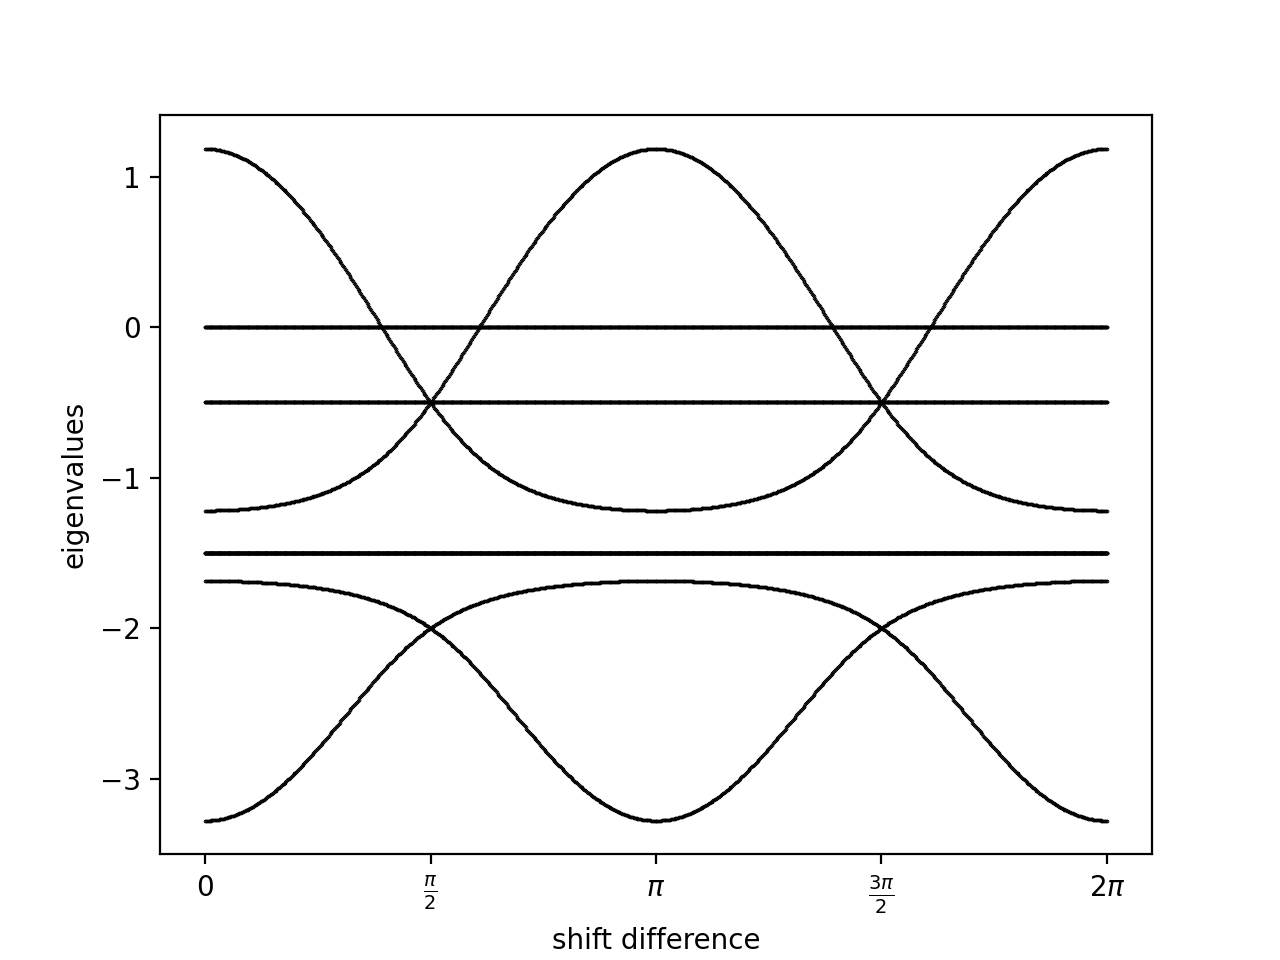

In [4]:
# eigenvalues as beta-alpha varies
N = len(G.nodes())
adjacency = (nx.linalg.adjacency_matrix(G)).todense()

eigs = []
for alpha in np.linspace(0, 2*np.pi, 1000):
    state = np.concatenate((splay(6), splay(6)+alpha))
    DF = np.array([[adjacency[j,k]*np.cos(state[j]-state[k]) for j in range(N)] for k in range(N)])
    for i in range(N):
        DF[i][i] = sum([-DF[i][j] for j in range(N) if j!=i])
    eigs = np.round(np.real(np.linalg.eig(DF)[0]), decimals=3)
    plt.scatter(N*[alpha], eigs, s=0.1, c='black')
    
plt.xlabel("shift difference")
plt.ylabel("eigenvalues")
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
plt.show()

# H36

<IPython.core.display.Javascript object>


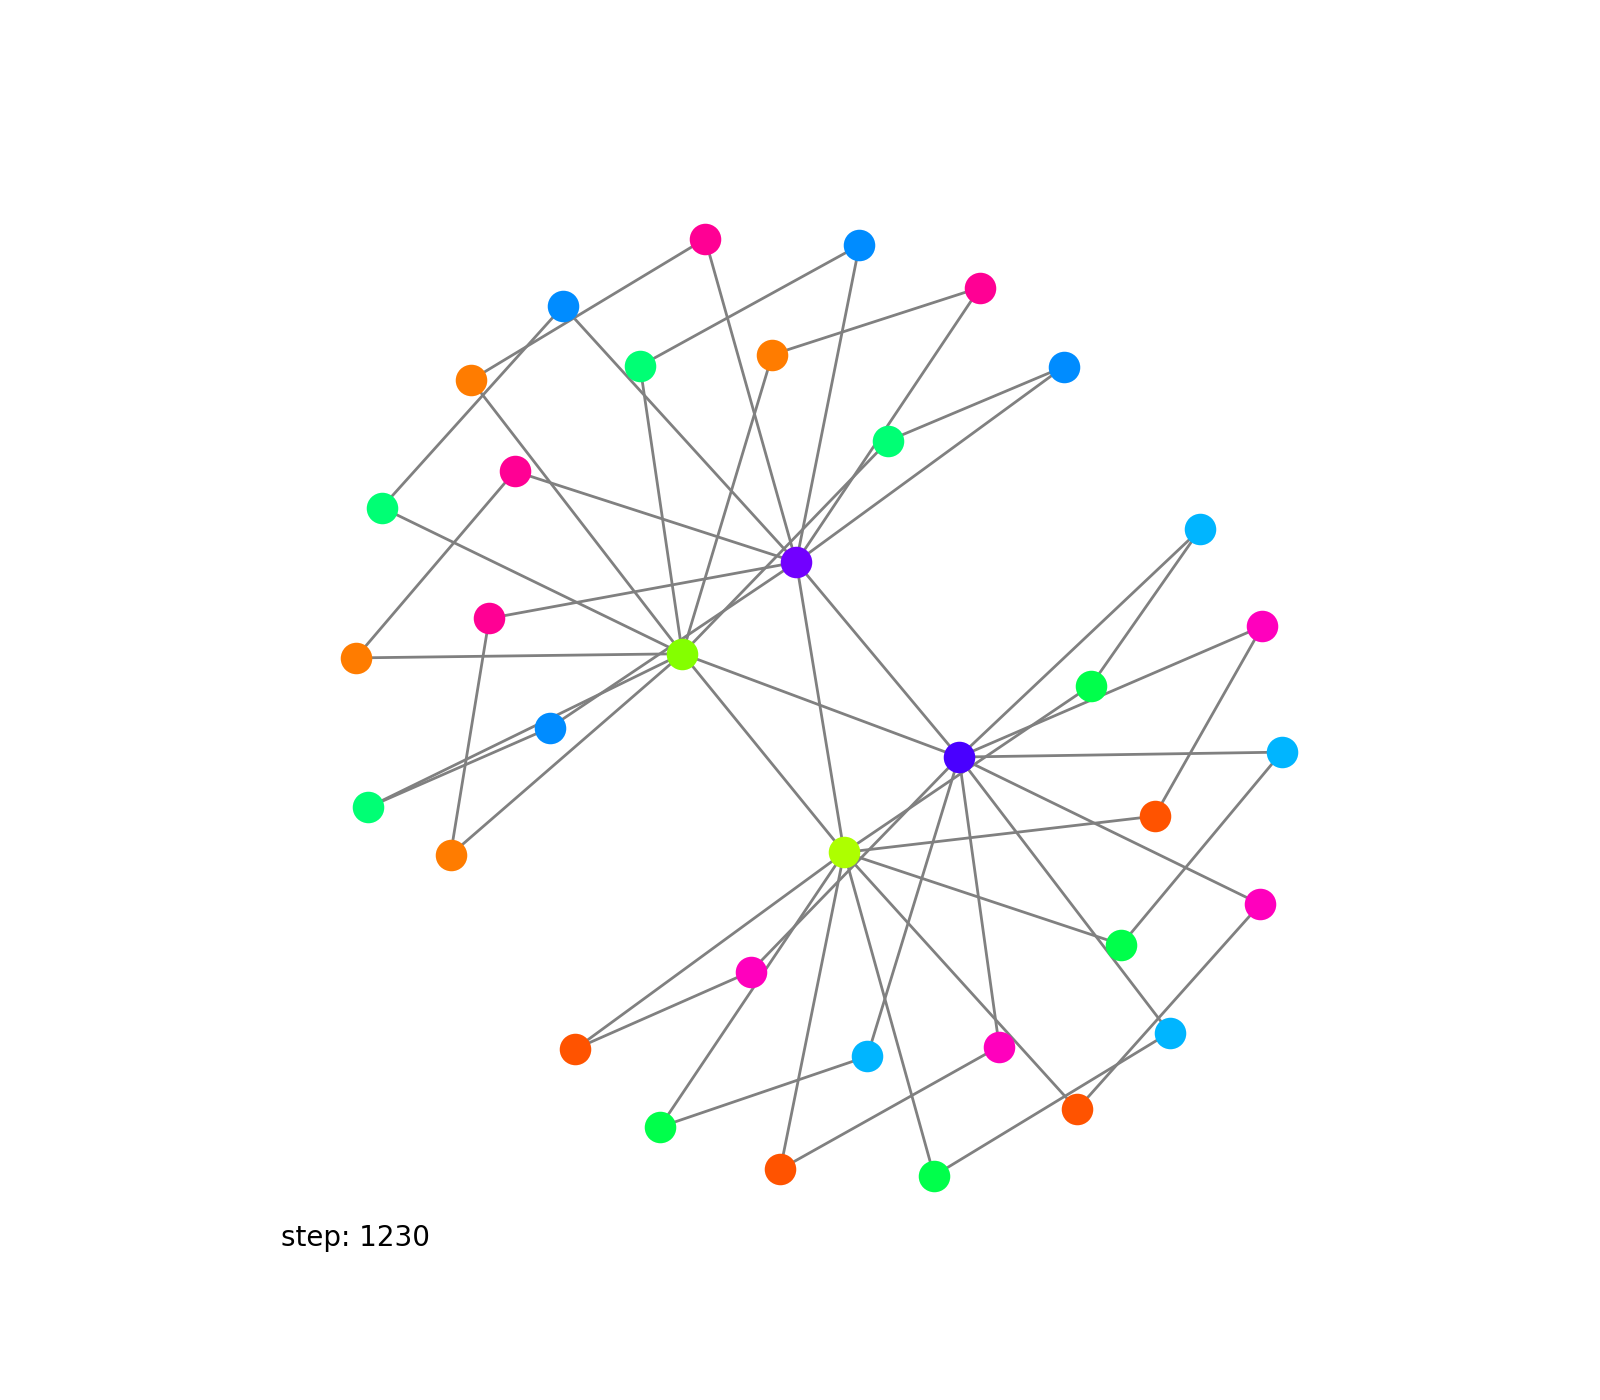

In [19]:
# graph construction
G1 = nx.cycle_graph(6)
G2 = nx.cycle_graph(6)
G2 = nx.relabel_nodes(G2, {k:k+6 for k in range(6)})
G = nx.union(G1, G2)
G.add_edge(0,6)
G.add_edge(0,9)
G.add_edge(3,6)
G.add_edge(3,9)
    
G.add_edge(0, 12+0)
G.add_edge(12+0, 12+1)
G.add_edge(12+1, 3)
G.add_edge(0, 12+2)
G.add_edge(12+2, 12+3)
G.add_edge(12+3, 3)

G.add_edge(6, 16+0)
G.add_edge(16+0, 16+1)
G.add_edge(16+1, 9)
G.add_edge(6, 16+2)
G.add_edge(16+2, 16+3)
G.add_edge(16+3, 9)

G.add_edge(0, 20+0)
G.add_edge(20+0, 20+1)
G.add_edge(20+1, 3)
G.add_edge(0, 20+2)
G.add_edge(20+2, 20+3)
G.add_edge(20+3, 3)

G.add_edge(6, 24+0)
G.add_edge(24+0, 24+1)
G.add_edge(24+1, 9)
G.add_edge(6, 24+2)
G.add_edge(24+2, 24+3)
G.add_edge(24+3, 9)

G.add_edge(0, 28+0)
G.add_edge(28+0, 28+1)
G.add_edge(28+1, 3)
G.add_edge(0, 28+2)
G.add_edge(28+2, 28+3)
G.add_edge(28+3, 3)

G.add_edge(6, 32+0)
G.add_edge(32+0, 32+1)
G.add_edge(32+1, 9)
G.add_edge(6, 32+2)
G.add_edge(32+2, 32+3)
G.add_edge(32+3, 9)

# for every alpha, beta the following state is an equilibrium
alpha = 0.0
beta = 1.4
def quart(spl):
    return np.array([spl[1],spl[2],spl[5],spl[4]])
alpha = np.pi/2
state = np.concatenate((splay(6)+beta, splay(6)+alpha,
                        quart(splay(6)+beta), quart(splay(6)+alpha),
                        quart(splay(6)+beta), quart(splay(6)+alpha),
                        quart(splay(6)+beta), quart(splay(6)+alpha),
                       ))

# computing trajectory
data = simulation(
            graph=G,
            initial_condition = state,
            step_size = 0.005,
            steps=5000,
            noise=0,
            )

# plot
kamada_kawai_plot(G, data, 10)

<IPython.core.display.Javascript object>


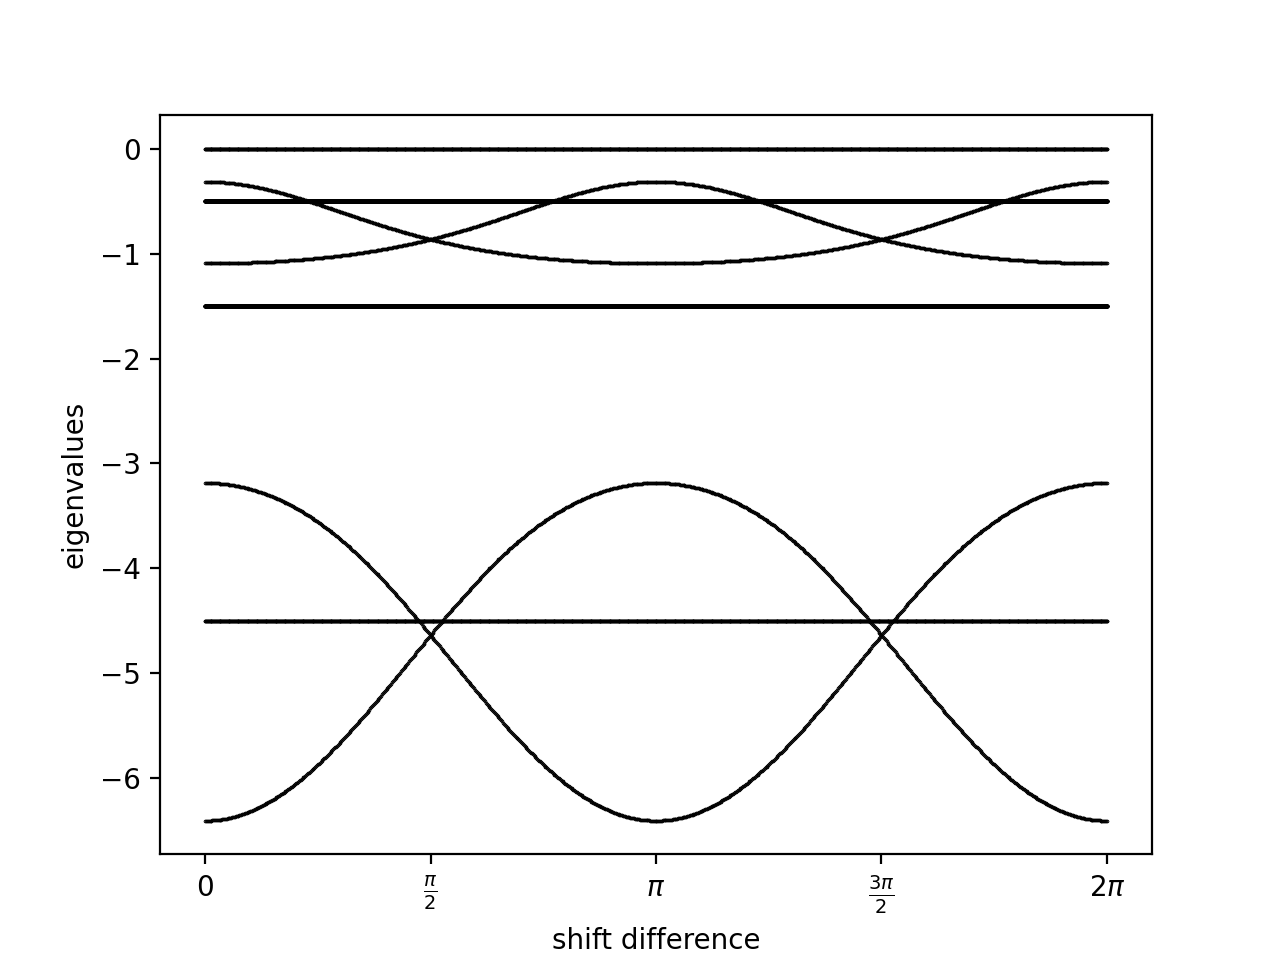

In [18]:
N = len(G.nodes())
adjacency = (nx.linalg.adjacency_matrix(G)).todense()

eigs = []
for alpha in np.linspace(0, 2*np.pi, 1000):
    state = np.concatenate((splay(6), splay(6)+alpha,
                        quart(splay(6)), quart(splay(6)+alpha),
                        quart(splay(6)), quart(splay(6)+alpha),
                        quart(splay(6)), quart(splay(6)+alpha),
                       ))
    DF = np.array([[adjacency[j,k]*np.cos(state[j]-state[k]) for j in range(N)] for k in range(N)])
    for i in range(N):
        DF[i][i] = sum([-DF[i][j] for j in range(N) if j!=i])
    eigs = np.round(np.real(np.linalg.eig(DF)[0]), decimals=3)
    plt.scatter(N*[alpha], eigs, s=0.1, c='black')
    
plt.xlabel("shift difference")
plt.ylabel("eigenvalues")
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
plt.show()

# H60

<IPython.core.display.Javascript object>


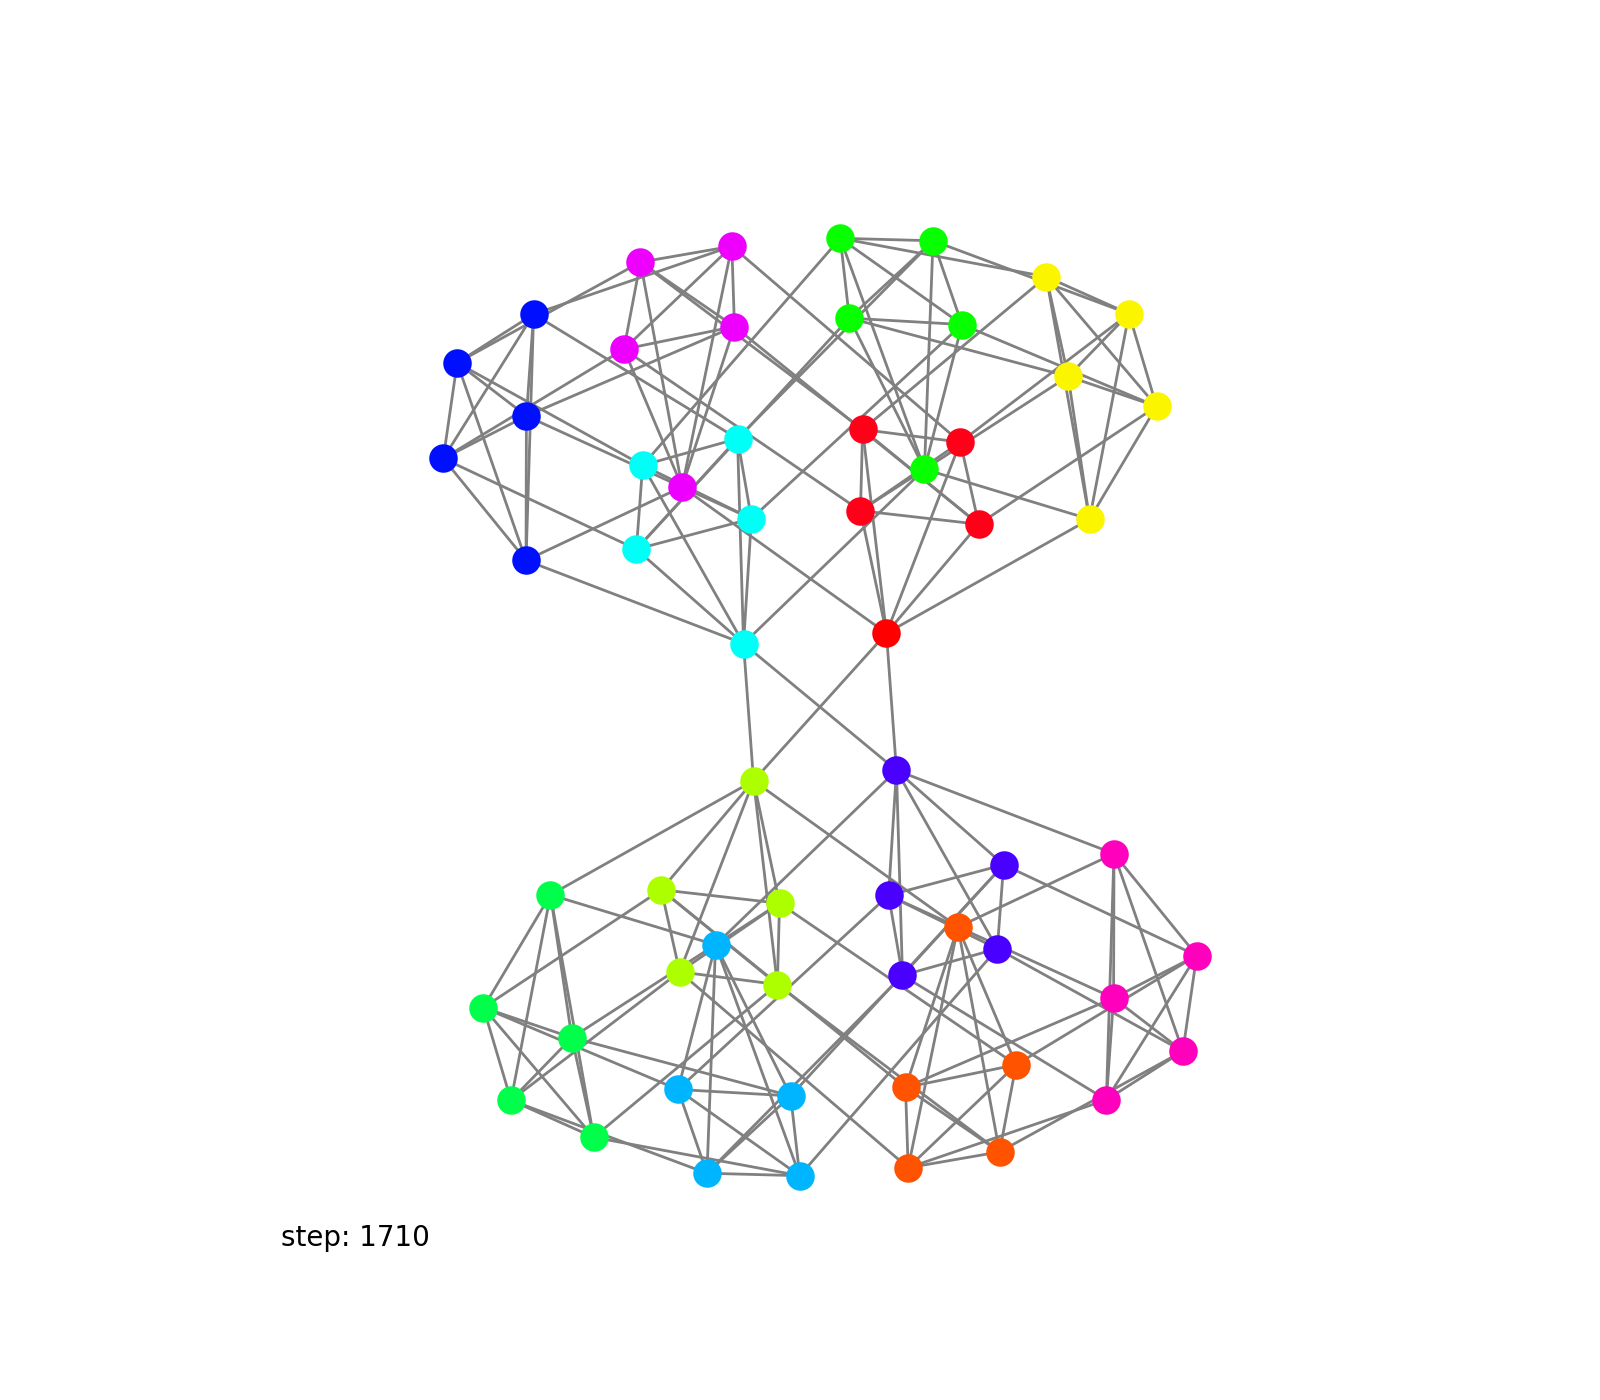

In [20]:
# graph construction
m = 5
C1 = nx.complete_graph(m)
C2 = nx.complete_graph(m)
C2 = nx.relabel_nodes(C2, {k:k+m for k in range(m)})
C3 = nx.complete_graph(m)
C3 = nx.relabel_nodes(C3, {k:k+2*m for k in range(m)})
C4 = nx.complete_graph(m)
C4 = nx.relabel_nodes(C4, {k:k+3*m for k in range(m)})
C5 = nx.complete_graph(m)
C5 = nx.relabel_nodes(C5, {k:k+4*m for k in range(m)})
C6 = nx.complete_graph(m)
C6 = nx.relabel_nodes(C6, {k:k+5*m for k in range(m)})
G = nx.union(C1,C2)
G = nx.union(G,C3)
G = nx.union(G,C4)
G = nx.union(G,C5)
G = nx.union(G,C6)

for i in range(6):
    for k in range(m):
        G.add_edge(k + i*m, k + ((i+1)%6)*m)
    
H = G
M = len(G)
H = nx.relabel_nodes(H, {k:k+M for k in range(M)})
G = nx.union(G, H)
G.add_edge(0, M)
G.add_edge(0, M + 3*m)
G.add_edge(3*m, M)
G.add_edge(3*m, M + 3*m)

# for every alpha, beta the following state is an equilibrium
alpha = 0.0
beta = 1.4
state = np.array([])
for x in splay(6):
    state = np.concatenate((state, np.tile([x],m)))
state = np.concatenate((state+alpha, state+beta))


# computing trajectory
data = simulation(
            graph=G,
            initial_condition = state,
            step_size = 0.05,
            steps=5000,
            noise=0,
            )

# plot
kamada_kawai_plot(G, data, 10)

<IPython.core.display.Javascript object>


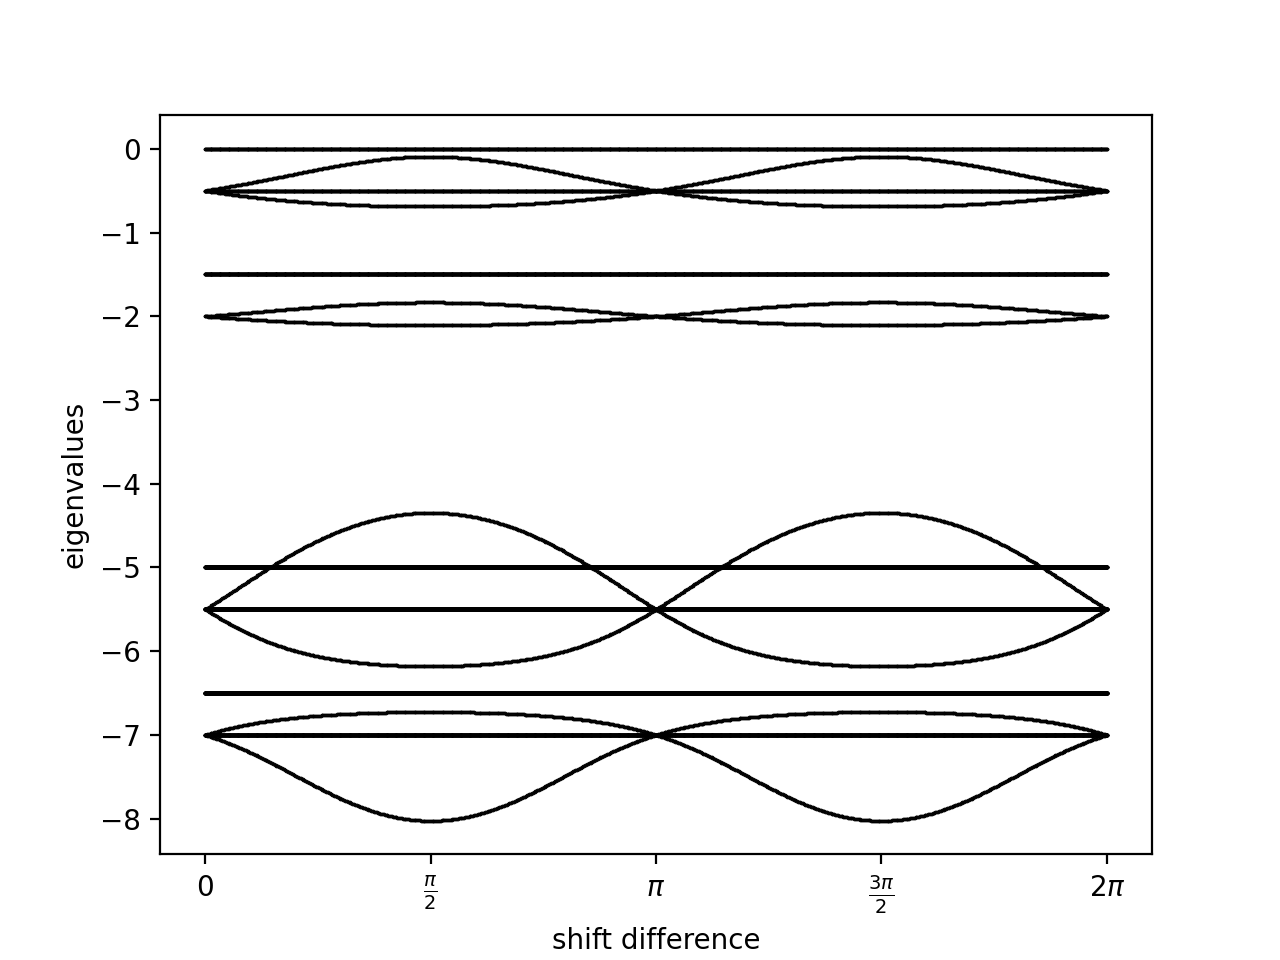

In [21]:
# eigenvalues
N = len(G.nodes())
adjacency = (nx.linalg.adjacency_matrix(G)).todense()

eigs = []
for alpha in np.linspace(0, 2*np.pi, 1000):
    state = np.array([])
    for x in splay(6):
        state = np.concatenate((state, np.tile([x],m)))
    state = np.concatenate((state, state+np.pi/2+alpha))
    DF = np.array([[adjacency[j,k]*np.cos(state[j]-state[k]) for j in range(N)] for k in range(N)])
    for i in range(N):
        DF[i][i] = sum([-DF[i][j] for j in range(N) if j!=i])
    eigs = np.round(np.real(np.linalg.eig(DF)[0]), decimals=3)
    plt.scatter(6*m*2*[alpha], eigs, s=0.1, c='black')
    
    
plt.xlabel("shift difference")
plt.ylabel("eigenvalues")
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
plt.show()

# H90

<IPython.core.display.Javascript object>


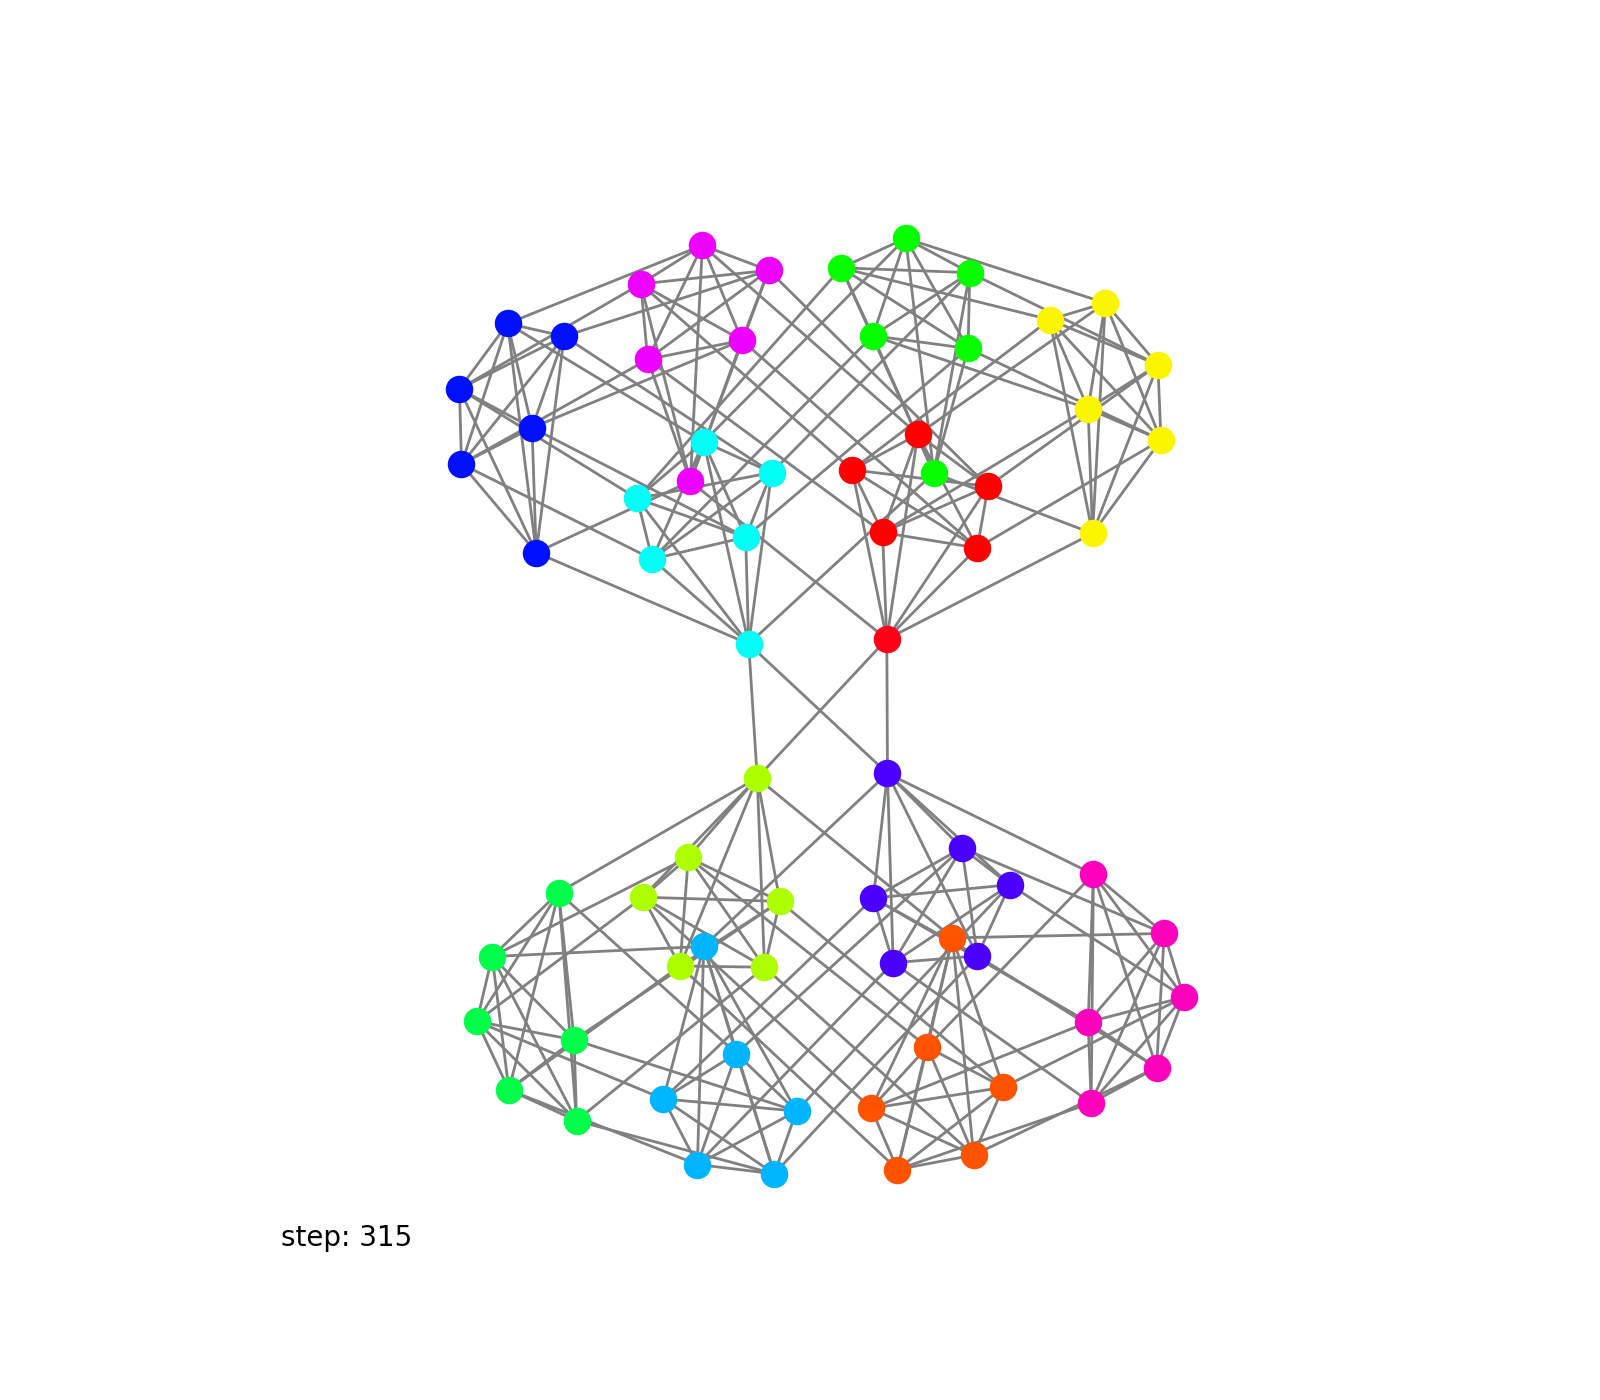

In [24]:
# graph construction
m = 6
A = nx.cycle_graph(m)
B = nx.cycle_graph(m)
G1 = nx.cartesian_product(A, B)
G1 = nx.convert_node_labels_to_integers(G1)
for i in range(m):
    for j in range(m):
        if i!=j:
            for k in range(m):
                G1.add_edge(i*m +k, j*m+k)

G2 = G1
G2 = nx.relabel_nodes(G2, {k:k+m*m for k in range(m*m)})
G = nx.union(G1, G2)

G.add_edge(0, m*m)
G.add_edge(0, m*m + int(m*m/2) + int(m/2))
G.add_edge(int(m/2), m*m)
G.add_edge(int(m/2), m*m + int(m*m/2) + int(m/2))

# for every alpha, beta the following state is an equilibrium
alpha = 0.0
beta = 1.4
state = np.tile(splay(m), m)
state = np.concatenate((state+alpha, state+beta))

# computing trajectory
data = simulation(
            graph=G,
            initial_condition = state,
            step_size = 0.005,
            steps=5000,
            noise=0,
            )

# plot
kamada_kawai_plot(G, data, 3)

<IPython.core.display.Javascript object>


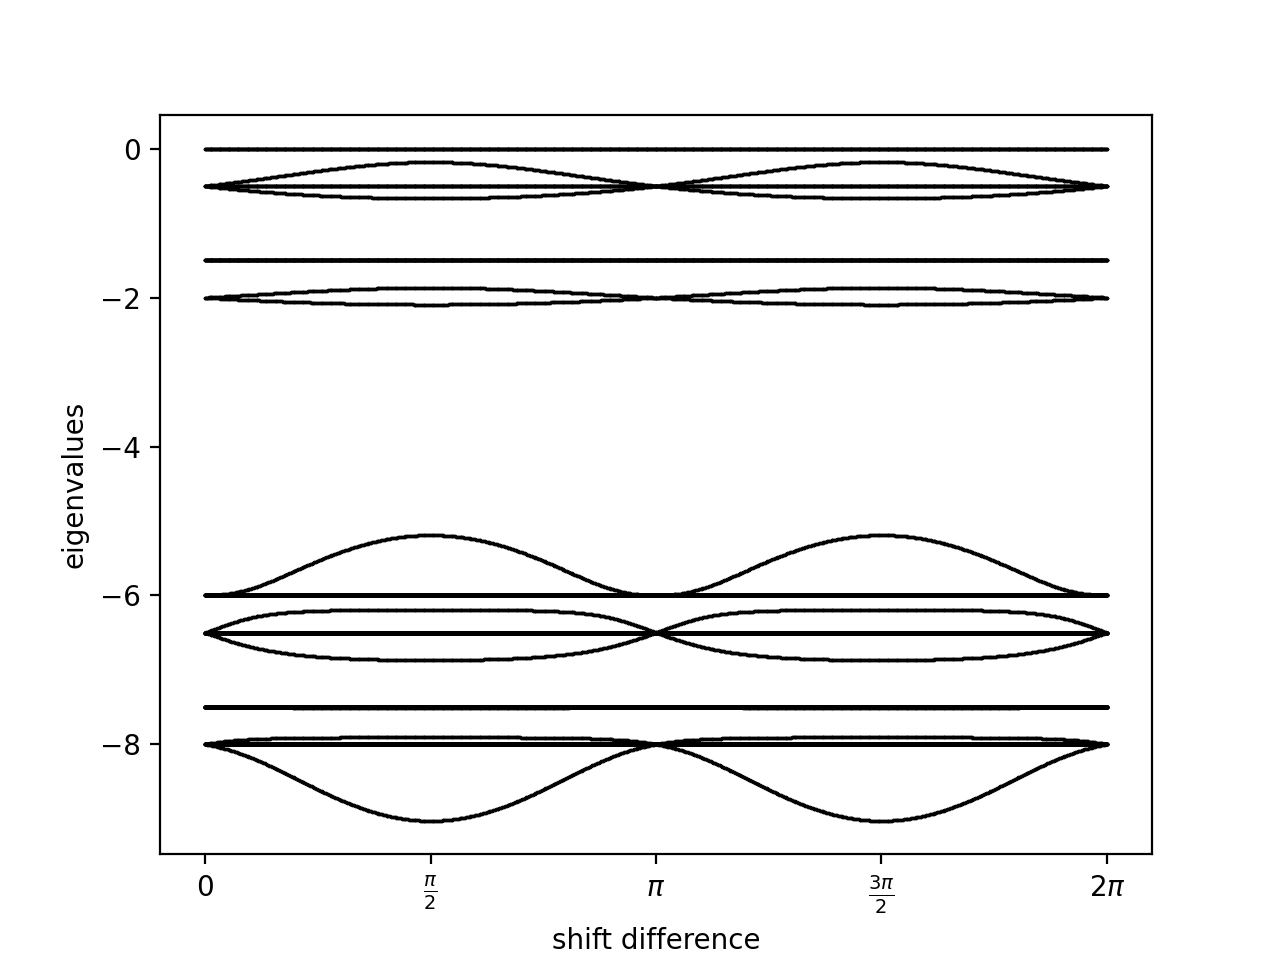

In [25]:
# eigenvalues
N = len(G.nodes())
adjacency = (nx.linalg.adjacency_matrix(G)).todense()

eigs = []
for alpha in np.linspace(0, 2*np.pi, 1000):
    state = np.tile(splay(m), m)
    state = np.concatenate((state, state+np.pi/2+alpha))
    DF = np.array([[adjacency[j,k]*np.cos(state[j]-state[k]) for j in range(N)] for k in range(N)])
    for i in range(N):
        DF[i][i] = sum([-DF[i][j] for j in range(N) if j!=i])
    eigs = np.round(np.real(np.linalg.eig(DF)[0]), decimals=3)
    plt.scatter(2*m*m*[alpha], eigs, s=0.1, c='black')
    
plt.xlabel("shift difference")
plt.ylabel("eigenvalues")
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
plt.show()